# Assignment 1(due on 12/06)

## Student:万思晨（12332276），Gtihub：Wanxiaochen

## 批改人：张鹏

## 得分：26/30

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#problem 1

In [2]:
earthquake = pd.read_csv("usgs_earthquakes.csv")
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [3]:
top_50_earthquakes = earthquake.nlargest(50, 'mag')
top_50_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


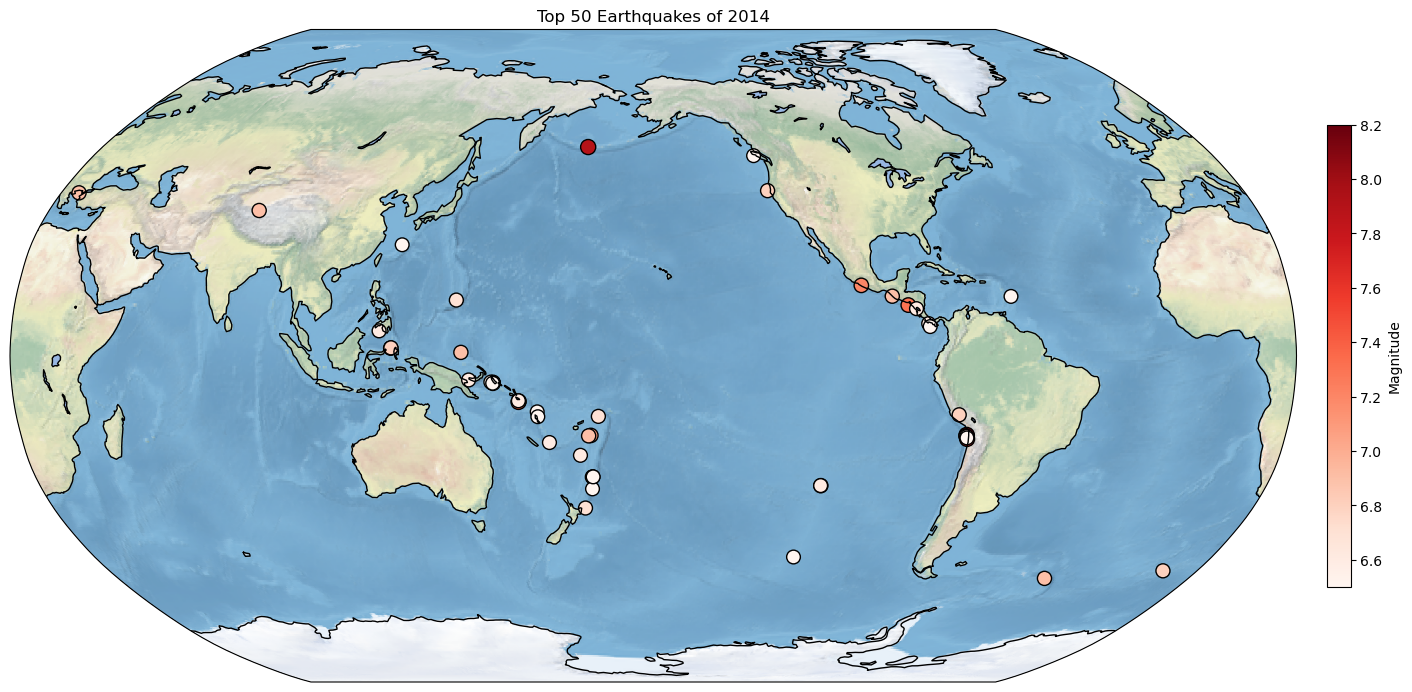

In [22]:
plt.figure(figsize=(20, 10))
#设置投影与底图
proj = ccrs.Robinson(central_longitude=-160)
ax = plt.axes(projection=proj)
ax.set_global()
ax.stock_img()

#增加特征
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.LAND, edgecolor='black') 
ax.add_feature(cfeature.LAKES, edgecolor='black')  
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor=cfeature.COLORS['water']) 

#绘制地震点，并用不同的颜色表示
sc = ax.scatter(top_50_earthquakes['longitude'], top_50_earthquakes['latitude'],
                c=top_50_earthquakes['mag'], cmap='Reds',marker='o', s=top_50_earthquakes['mag']*15,
                alpha=1, edgecolors='black', transform=ccrs.Geodetic())
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude')

plt.title('Top 50 Earthquakes of 2014')
plt.show()

### 第一题代码运行正常，可以输出正确的图像。
### 得分：10/10
### ----------------------------------------------------

#problem 2

In [10]:
GLDAS = xr.open_dataset("GLDAS_file.nc", engine="netcdf4")
GLDAS

<xarray.Dataset>
Dimensions:                 (time: 120, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time                    (time) datetime64[ns] 2001-01-01 ... 2010-12-01
  * lon                     (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                     (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables: (12/39)
    time_bnds               (time, bnds) datetime64[ns] ...
    Swnet_tavg              (time, lat, lon) float32 ...
    Lwnet_tavg              (time, lat, lon) float32 ...
    Qle_tavg                (time, lat, lon) float32 ...
    Qh_tavg                 (time, lat, lon) float32 ...
    Qg_tavg                 (time, lat, lon) float32 ...
    ...                      ...
    Rainf_f_tavg            (time, lat, lon) float32 ...
    Tair_f_inst             (time, lat, lon) float32 ...
    Qair_f_inst             (time, lat, lon) float32 ...
    Psurf_f_inst            (time, lat, lon) float32 ...
    SWdown_f_tavg           (time, lat, lon) float32 ...
    LWdown_f_tavg           (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2020-09-03T17:17:03.094
    source:                 CLSM_F2.5 forced with Princeton_V2.2
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [11]:
temperature = GLDAS['Tair_f_inst']
mean_temperature = temperature.mean(dim='time')
mean_temperature

<xarray.DataArray 'Tair_f_inst' (lat: 150, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 86.5 87.5 88.5 89.5

#2.1

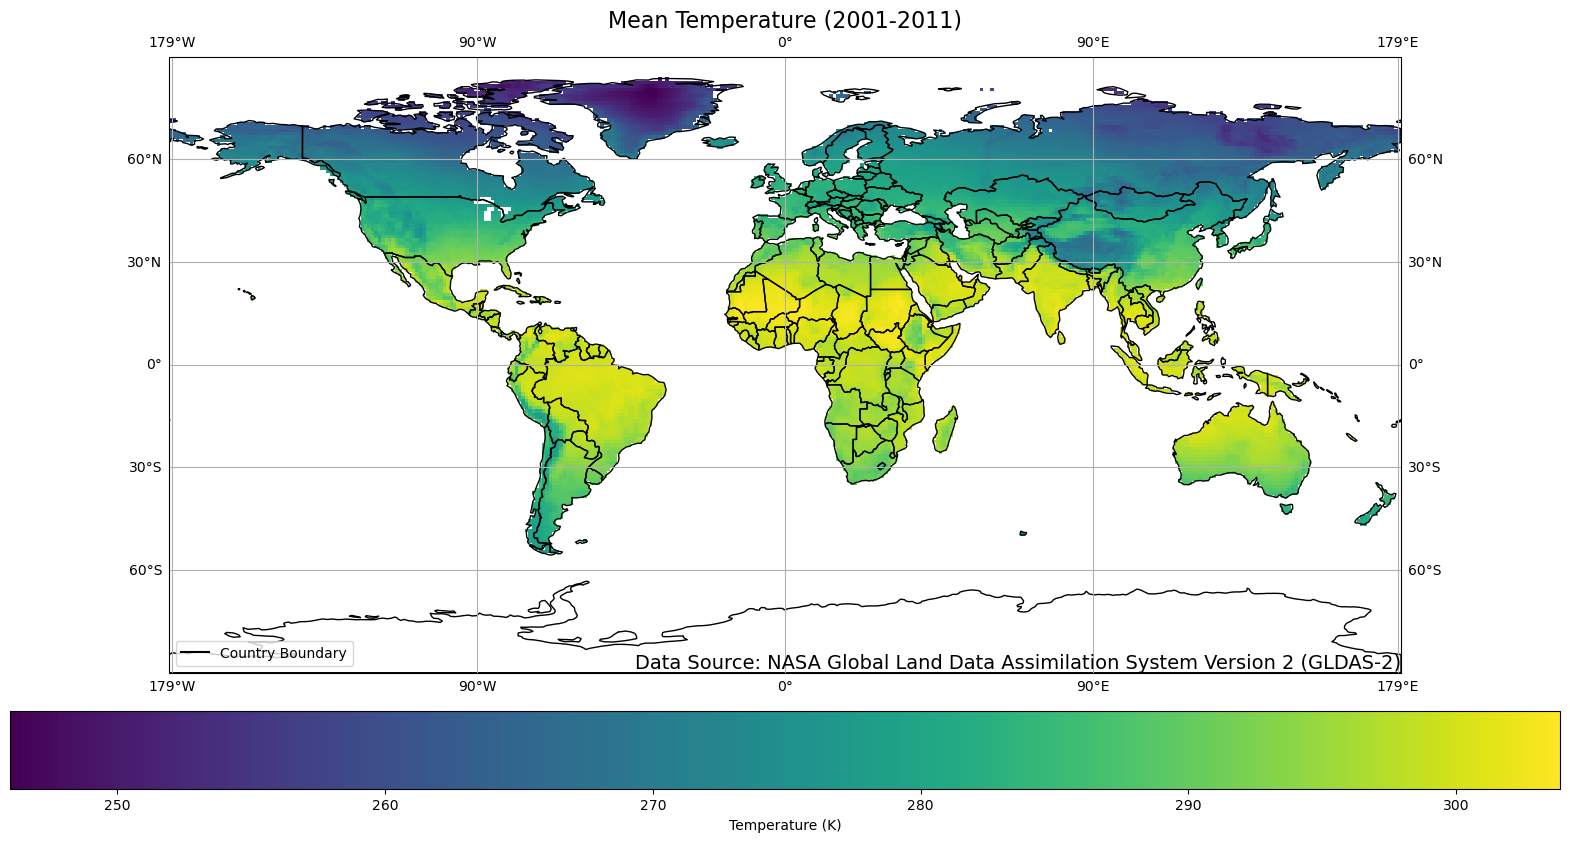

In [24]:
#设置投影与底图
plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_global()

#绘制变量增加颜色条并修改颜色条名称
temperature = mean_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
cbar = plt.colorbar(temperature, orientation='horizontal', pad=0.05)
cbar.set_label('Temperature (K)') 

#添加国家边界与国境线图例
country_boundary = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', scale='110m', edgecolor='black', facecolor='none')
ax.add_feature(country_boundary)
line = plt.Line2D([], [], color='black') 
ax.add_artist(line) 
line.set_label('Country Boundary')
plt.legend(loc='lower left')

#添加经纬格线
ax.gridlines(draw_labels=True, xlocs=[-179, -90, 0, 90,179])

#增加文本，即数据来源
ax.text(1, 0, 'Data Source: NASA Global Land Data Assimilation System Version 2 (GLDAS-2)',
         horizontalalignment='right', verticalalignment='bottom',
         transform=ax.transAxes, fontsize=14)  

plt.title('Mean Temperature (2001-2011)', fontsize=16)
plt.show()

#2.2

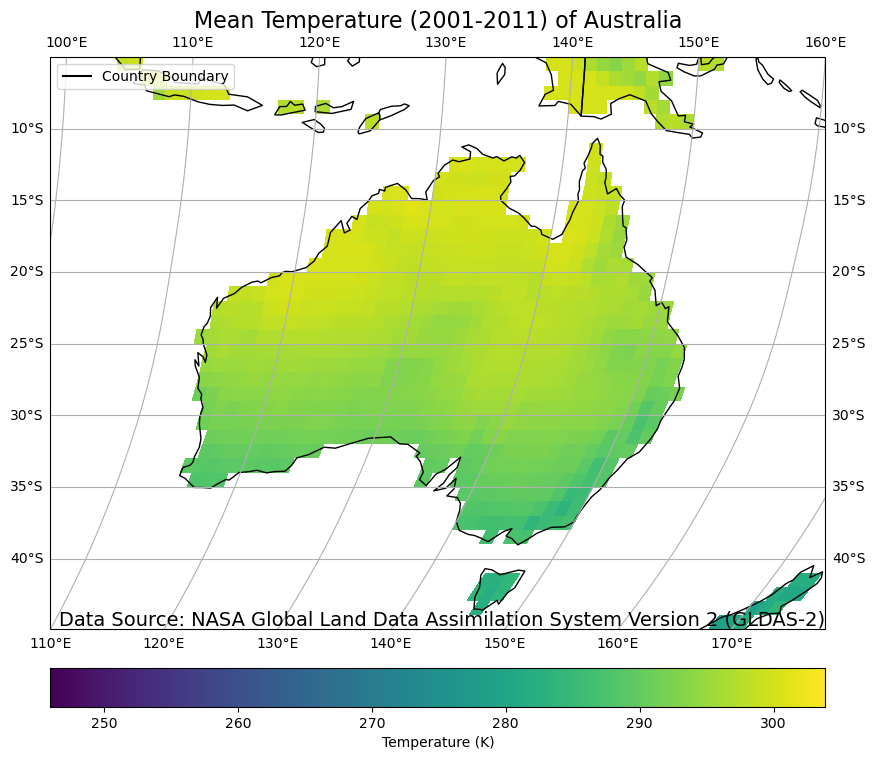

In [23]:
#设置投影与底图
plt.figure(figsize=(10, 10))
proj = ccrs.Robinson() 
ax = plt.axes(projection=proj)

#设置图像范围
ax.set_extent([110, 160, -45, -5], crs=ccrs.PlateCarree())

#绘制变量增加颜色条并修改颜色条名称
temperature = mean_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
cbar = plt.colorbar(temperature, orientation='horizontal', pad=0.05)
cbar.set_label('Temperature (K)') 

#添加国家边界与国境线图例
country_boundary = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', scale='110m', edgecolor='black', facecolor='none')
ax.add_feature(country_boundary)
line = plt.Line2D([], [], color='black') 
ax.add_artist(line) 
line.set_label('Country Boundary')
plt.legend(loc='upper left')

#添加经纬格线
ax.gridlines(draw_labels=True)

#增加文本，即数据来源
ax.text(1, 0, 'Data Source: NASA Global Land Data Assimilation System Version 2 (GLDAS-2)',
         horizontalalignment='right', verticalalignment='bottom',
         transform=ax.transAxes, fontsize=14) 

plt.title('Mean Temperature (2001-2011) of Australia', fontsize=16)
plt.show()

### 第二题代码运行正常，可以输出正确图像；
### 第一张图缺少x、y轴的经纬度文字、text box
### 第二张图缺少缺少x、y轴的经纬度文字、text box
### 得分：16/20

### ----------------------------------------------------